In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os 
import json

In [2]:
path = os.getcwd()
print(path)

os.chdir('../../')
homePath = os.getcwd()
print(homePath)

/Users/natsuki/Desktop/Serializable/testJson/MakeGraph/twitter10000
/Users/natsuki/Desktop/Serializable/testJson


In [3]:
df_sqa = pd.read_json(f'{homePath}/MakeGraph/twitter10000/SQAtwitter10000.json') #ここ変更すればjson変えられる
df_sqa = df_sqa.sort_values('time')
display(df_sqa)
df_qa = pd.read_json(f'{homePath}/MakeGraph/twitter10000/QAtwitter10000.json') #ここ変更すればjson変えられる
df_qa = df_qa.sort_values('time')
display(df_qa)

#SMTの実行時間を計測しておく
SMT_time = 318
SMT_feasiblerate = 1

,min,mean,max,feasibleRate,time,TTS,TTS(0999),TTS(09999)
50,0,1.474,6,0.225,8.028649,152.544337,224.802181,297.060025
150,0,0.931,6,0.391,11.203691,112.036912,156.851677,212.870134
250,0,0.796,4,0.449,14.269205,114.153639,171.230458,228.307278
350,0,0.755,4,0.473,17.435582,139.484655,191.791401,261.533729
450,0,0.702,4,0.491,20.652184,144.565285,227.174019,289.130569
550,0,0.670,5,0.499,23.684561,165.791930,236.845615,331.583861
650,0,0.588,5,0.532,26.949903,188.649319,269.499028,350.348736
750,0,0.574,4,0.558,30.084601,180.507606,270.761408,361.015211
850,0,0.545,4,0.591,33.286561,199.719368,266.292490,366.152174
950,0,0.597,4,0.551,36.361501,218.169007,327.253511,436.338015


,min,mean,max,feasibleRate,time,TTS,TTS(0999),TTS(09999)
20,0,0.022,1,0.978,0.18142,0.36284,0.36284,0.54426
30,0,0.031,1,0.969,0.18260,0.36520,0.36520,0.54780
10,0,0.043,1,0.957,0.19014,0.38028,0.57042,0.57042
40,0,0.035,1,0.965,0.20724,0.41448,0.62172,0.62172
60,0,0.019,1,0.981,0.22724,0.45448,0.45448,0.68172
50,0,0.022,1,0.978,0.22796,0.45592,0.45592,0.68388
80,0,0.012,1,0.988,0.24762,0.49524,0.49524,0.74286
70,0,0.021,2,0.980,0.25114,0.50228,0.50228,0.75342
90,0,0.025,1,0.975,0.27286,0.54572,0.54572,0.81858
110,0,0.025,1,0.975,0.27680,0.55360,0.55360,0.83040


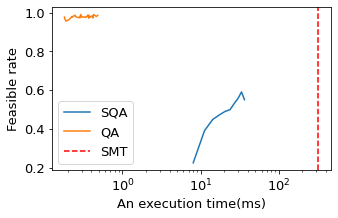

In [4]:
plt.figure(figsize=(5,3))

sqa_time = df_sqa['time']
sqa_fsr = df_sqa['feasibleRate']
plt.plot(sqa_time, sqa_fsr, label='SQA')

qa_time = df_qa['time']
qa_fsr = df_qa['feasibleRate']
plt.plot(qa_time, qa_fsr, label='QA')

plt.axvline(x=SMT_time, color='red', linestyle='--', label = 'SMT')

#ラベルなどの出力
plt.legend(fontsize=13)
plt.xlabel("An execution time(ms)",fontsize=13)
plt.ylabel("Feasible rate",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/QAtwitter10000_time_fsr.pdf', bbox_inches='tight') #名前変える
plt.show()

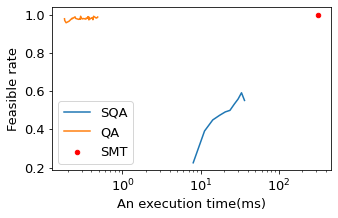

In [5]:
plt.figure(figsize=(5,3))

sqa_time = df_sqa['time']
sqa_fsr = df_sqa['feasibleRate']
plt.plot(sqa_time, sqa_fsr, label='SQA')

qa_time = df_qa['time']
qa_fsr = df_qa['feasibleRate']
plt.plot(qa_time, qa_fsr, label='QA')

plt.scatter(SMT_time, SMT_feasiblerate, color='red', marker='o', label = 'SMT', s=20)

#ラベルなどの出力
plt.legend(fontsize=13)
plt.xlabel("An execution time(ms)",fontsize=13)
plt.ylabel("Feasible rate",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/QAtwitter10000_time_fsr_dot.pdf', bbox_inches='tight') #名前変える
plt.show()

In [5]:
df_sqa = df_sqa.sort_values('TTS')
display(df_sqa)
df_qa = df_qa.sort_values('TTS')
display(df_qa)

,min,mean,max,feasibleRate,time,TTS
150,0,0.931,6,0.391,11.203691,112.036912
250,0,0.796,4,0.449,14.269205,114.153639
350,0,0.755,4,0.473,17.435582,139.484655
450,0,0.702,4,0.491,20.652184,144.565285
50,0,1.474,6,0.225,8.028649,152.544337
550,0,0.670,5,0.499,23.684561,165.791930
750,0,0.574,4,0.558,30.084601,180.507606
650,0,0.588,5,0.532,26.949903,188.649319
850,0,0.545,4,0.591,33.286561,199.719368
950,0,0.597,4,0.551,36.361501,218.169007


,min,mean,max,feasibleRate,time,TTS
140,0,0.011,2,0.991,0.29162,0.29162
20,0,0.022,1,0.978,0.18142,0.36284
30,0,0.031,1,0.969,0.18260,0.36520
10,0,0.043,1,0.957,0.19014,0.38028
40,0,0.035,1,0.965,0.20724,0.41448
260,0,0.009,1,0.991,0.42678,0.42678
60,0,0.019,1,0.981,0.22724,0.45448
50,0,0.022,1,0.978,0.22796,0.45592
80,0,0.012,1,0.988,0.24762,0.49524
70,0,0.021,2,0.980,0.25114,0.50228


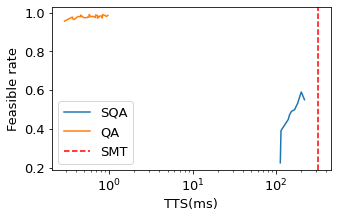

In [6]:
plt.figure(figsize=(5,3))

sqa_tts = df_sqa['TTS']
plt.plot(sqa_tts, sqa_fsr, label='SQA')

qa_tts = df_qa['TTS']
plt.plot(qa_tts, qa_fsr, label='QA')

plt.axvline(x=SMT_time, color='red', linestyle='--', label = 'SMT')

#ラベルなどの出力
plt.legend(fontsize=13)
plt.xlabel("TTS(ms)",fontsize=13)
plt.ylabel("Feasible rate",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/QAtwitter10000_tts_fsr.pdf',  bbox_inches='tight') #名前変える
plt.show()

In [6]:
df_sqa = pd.read_json(f'{homePath}/MakeGraph/twitter10000/SQAtwitter10000.json') #ここ変更すればjson変えられる
df_sqa = df_sqa.sort_values('time')
display(df_sqa)
df_qa = pd.read_json(f'{homePath}/MakeGraph/twitter10000/QAtwitter10000.json') #ここ変更すればjson変えられる
df_qa = df_qa.sort_values('time')
display(df_qa)

#SMTの実行時間を計測しておく
SMT_time = 318

,min,mean,max,feasibleRate,time,TTS,TTS(0999),TTS(09999)
50,0,1.474,6,0.225,8.028649,152.544337,224.802181,297.060025
150,0,0.931,6,0.391,11.203691,112.036912,156.851677,212.870134
250,0,0.796,4,0.449,14.269205,114.153639,171.230458,228.307278
350,0,0.755,4,0.473,17.435582,139.484655,191.791401,261.533729
450,0,0.702,4,0.491,20.652184,144.565285,227.174019,289.130569
550,0,0.670,5,0.499,23.684561,165.791930,236.845615,331.583861
650,0,0.588,5,0.532,26.949903,188.649319,269.499028,350.348736
750,0,0.574,4,0.558,30.084601,180.507606,270.761408,361.015211
850,0,0.545,4,0.591,33.286561,199.719368,266.292490,366.152174
950,0,0.597,4,0.551,36.361501,218.169007,327.253511,436.338015


,min,mean,max,feasibleRate,time,TTS,TTS(0999),TTS(09999)
20,0,0.022,1,0.978,0.18142,0.36284,0.36284,0.54426
30,0,0.031,1,0.969,0.18260,0.36520,0.36520,0.54780
10,0,0.043,1,0.957,0.19014,0.38028,0.57042,0.57042
40,0,0.035,1,0.965,0.20724,0.41448,0.62172,0.62172
60,0,0.019,1,0.981,0.22724,0.45448,0.45448,0.68172
50,0,0.022,1,0.978,0.22796,0.45592,0.45592,0.68388
80,0,0.012,1,0.988,0.24762,0.49524,0.49524,0.74286
70,0,0.021,2,0.980,0.25114,0.50228,0.50228,0.75342
90,0,0.025,1,0.975,0.27286,0.54572,0.54572,0.81858
110,0,0.025,1,0.975,0.27680,0.55360,0.55360,0.83040


Int64Index([50, 150, 250, 350, 450, 550, 650, 750, 850, 950], dtype='int64')


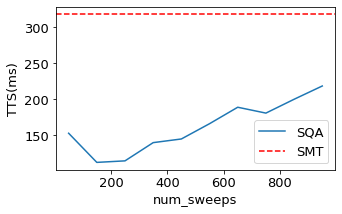

In [7]:
plt.figure(figsize=(5,3))
print(df_sqa.index)

# 線グラフ
plt.plot(df_sqa.index, df_sqa['TTS'], label='SQA')

plt.axhline(y=SMT_time, color='red', linestyle='--', label = 'SMT')

plt.legend(fontsize=13)
plt.xlabel("num_sweeps",fontsize=13)
plt.ylabel("TTS(ms)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
#plt.yscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/twitter10000_sweeps_TTS.pdf', bbox_inches='tight') #名前変える
# グラフの表示
plt.show()

QAとの比較

Int64Index([50, 150, 250, 350, 450, 550, 650, 750, 850, 950], dtype='int64')


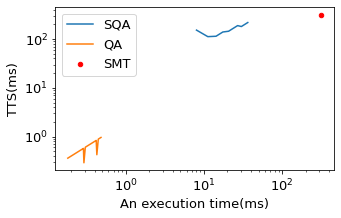

In [8]:
plt.figure(figsize=(5,3))
print(df_sqa.index)

# 線グラフ
plt.plot(df_sqa['time'], df_sqa['TTS'], label='SQA')

plt.plot(df_qa['time'], df_qa['TTS'], label='QA')

plt.axhline(y=SMT_time, color='red', linestyle='--', label = 'SMT')

plt.legend(fontsize=13)
plt.xlabel("An execution time(ms)",fontsize=13)
plt.ylabel("TTS(ms)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.yscale('log') #logでスケールさせたいとき
plt.xscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/QAtwitter_time_TTS.pdf', bbox_inches='tight') #名前変える
# グラフの表示
plt.show()

Int64Index([50, 150, 250, 350, 450, 550, 650, 750, 850, 950], dtype='int64')


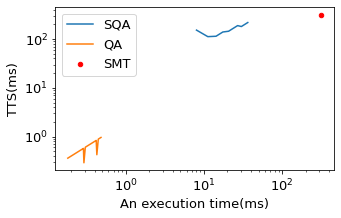

In [9]:
plt.figure(figsize=(5,3))
print(df_sqa.index)

# 線グラフ
plt.plot(df_sqa['time'], df_sqa['TTS'], label='SQA')

plt.plot(df_qa['time'], df_qa['TTS'], label='QA')

plt.scatter(SMT_time, SMT_time, color='red', marker='o', label = 'SMT', s=20)

plt.legend(fontsize=13)
plt.xlabel("An execution time(ms)",fontsize=13)
plt.ylabel("TTS(ms)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.yscale('log') #logでスケールさせたいとき
plt.xscale('log') #logでスケールさせたいとき
plt.savefig(f'{homePath}/MakeGraph/twitter10000/QAtwitter_time_TTS_dot.pdf', bbox_inches='tight') #名前変える
# グラフの表示
plt.show()